In [ ]:
#  Phase 2 : INNOVATION 

PROJECT TITLE : MEASURE ENERGY CONSUMPTION

NAME :S.DEEPAN 

TEAM ID : 5278 

TEAM NAME : PROJ_204224_TEAM_1

COLLEGE  CODE - NAME : 9238 – MANGAYARKARASI COLLEGE OF ENGINEERING , PARAVAI , MADURAI.

GITHUB REPOSITORY LINK :https://github.com/Deepan4008/IBM-MUDHALVAN.git


#  Abstract :

The measurement of energy consumption is critical in understanding and optimizing energy usage in various sectors, including manufacturing sites, homes, commercial buildings, and transportation. However, the manual collection and analysis of energy consumption data can be time-consuming and error-prone. The project aims to create an automated system that measures energy consumption, analyzes the data, and provides visualizations for informed decision-making. The major goal  is to enhance efficiency, accuracy, and ease of understanding in managing energy systems

#  DESCRIPTION FOR THE PACKAGES:

      The code snippet provided imports essential Python libraries for data analysis and visualization, including pandas, numpy, matplotlib, and seaborn.This combination of libraries suggests the code may be used for data preprocessing and analysis, including text data manipulation and visualization.....

In [18]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# load the data
df = pd.read_csv('PJME_hourly.csv')

In [19]:
# turn data to datetime
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

# Plot :
The data we will be using is hourly power consumption data from PJM. Energy consumption has some unique characteristics. It will be interesting to see how prophet picks them up.

Pulling the PJM East which has data from 2002-2018 for the entire east region.


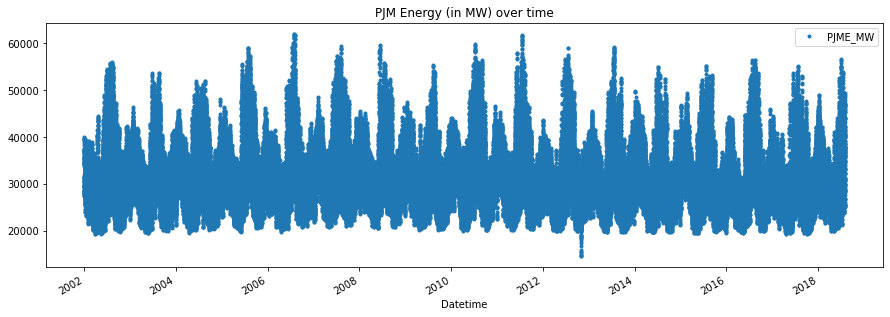

In [20]:
# create the plot
df.plot(style='.',
        figsize=(15, 5),
        title='PJM Energy (in MW) over time')
plt.show()

In [21]:
# train / test split
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

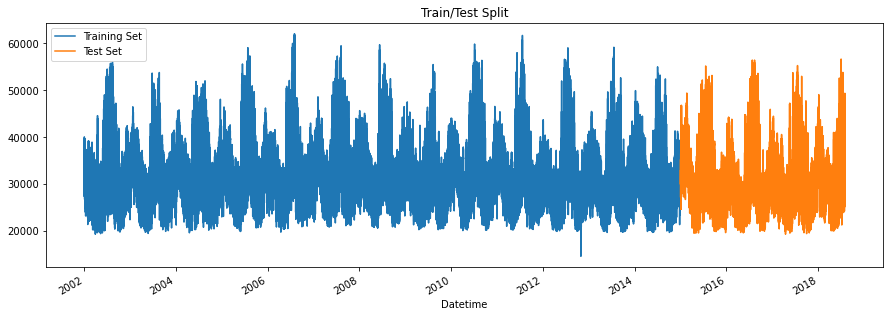

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Train/Test Split')
test.plot(ax=ax, label='Test Set')

ax.legend(['Training Set', 'Test Set'])
plt.show()

# Feature Extraction: 
This code snippet defines a function create_features(df) that takes a DataFrame as input and adds several new columns to it, capturing different time-related features. Specifically, it adds columns for hour, day of the week, quarter, month, year, day of the year, day of the month, and week of the year. 

In [23]:
# feature creation
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

#   Data Visualization : 

                 Using graphs and charts can make complex data more understandable and actionable 
                         A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.
                         
                         
      

# Hourly Megawatt:
                     This code snippet visualizes the hourly Megawatt (MW) consumption using a box plot. The x-axis represents the hours of the day, and the y-axis represents the corresponding Megawatt values. The box plot provides a summary of the data distribution, showing the median, quartiles, and potential outliers for each hour.

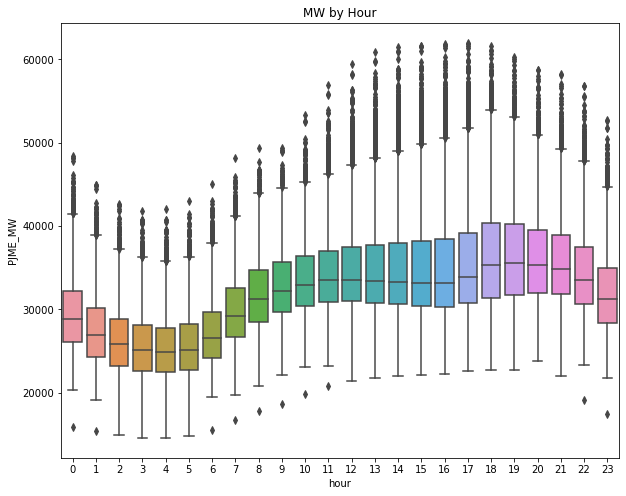

In [24]:
# visualize the hourly Megawatt
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

# Monthly Megawatt:
               This code creates a box plot to visualize monthly Megawatt (MW) consumption. The x-axis represents the months, and the y-axis represents the corresponding Megawatt values. The plot uses a blue color palette. The box plot summarizes the distribution of Megawatt consumption for each month, displaying key statistics like median, quartiles, and outliers.
             

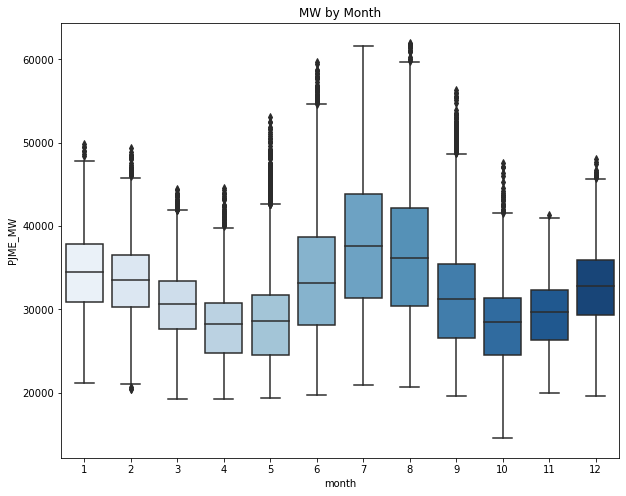

In [25]:
# visualize the monthly Megawatt
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

# Preprocessing:
    The create_features() function is applied to both the training and testing datasets, generating additional features from the existing data.

    

# Feature Selection: 
    Six specific features ('dayofyear', 'hour', 'dayofweek', 'quarter', 'month', and 'year') are selected for the machine learning model.

   

 # Target Variable: 
    The target variable is 'PJME_MW'. This variable represents the value the model aims to predict.

    

# Data Splitting: 
    The data is split into features (X_train and X_test) and target variables (y_train and y_test) for both training and testing sets. X_train and y_train are used for training the model, while X_test and y_test are used for evaluating its performance.

In [26]:
# preprocessing
train = create_features(train)
test = create_features(test)
# Feature Selection
features = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
target = 'PJME_MW'
# Target Variable
X_train = train[features]
y_train = train[target]
# Data Splitting 
X_test = test[features]
y_test = test[target]

# ARCHITECTURE DIAGRAM FOR XGBOOST
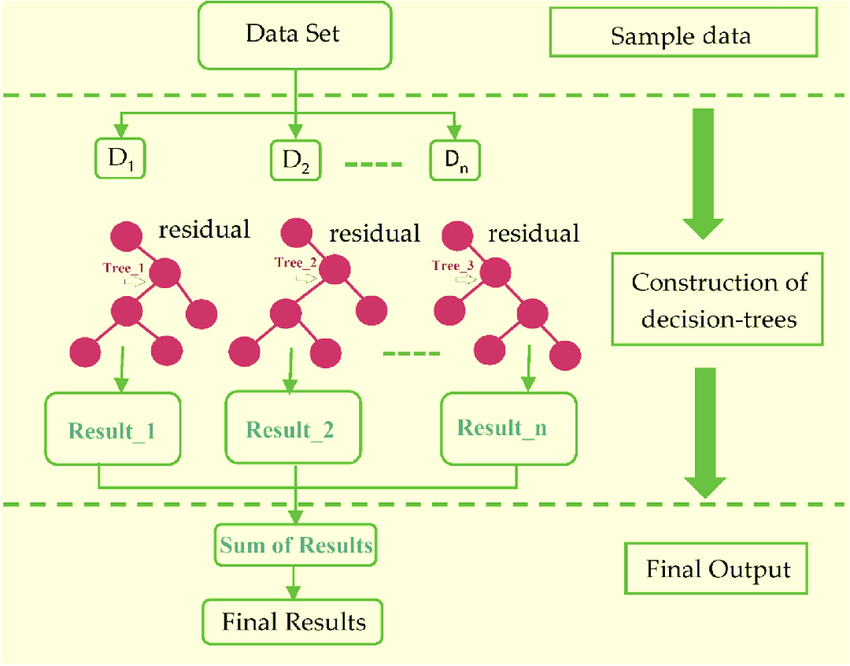

# XG Boost:
   This code snippet demonstrates the use of the XGBoost library, a popular machine learning algorithm for regression tasks. It imports the xgboost module and mean_squared_error function from scikit-learn. It builds a regression model using XGBoost (XGBRegressor) with specified hyperparameters such as the number of estimators, early stopping rounds, objective function, maximum depth, and learning rate. The model is trained on the X_train and y_train data and evaluated on both the training and test sets (X_test and y_test). The verbose=100 parameter provides detailed training progress information.

In [27]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# build the regression model
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:32605.13970	validation_1-rmse:31657.15729


C:\Users\cse4\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [15:51:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12584.35462	validation_1-rmse:11747.28803

[200]	validation_0-rmse:5837.33066	validation_1-rmse:5363.58554

[300]	validation_0-rmse:3923.28511	validation_1-rmse:4020.48045

[400]	validation_0-rmse:3447.54638	validation_1-rmse:3860.60088

[500]	validation_0-rmse:3288.19208	validation_1-rmse:3816.37862

[600]	validation_0-rmse:3206.55619	validation_1-rmse:3779.04119

[700]	validation_0-rmse:3153.61368	validation_1-rmse:3754.45684

[800]	validation_0-rmse:3114.34038	validation_1-rmse:3738.38209

[900]	validation_0-rmse:3084.39550	validation_1-rmse:3730.01893

[989]	validation_0-rmse:3059.85847	validation_1-rmse:3727.94591


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

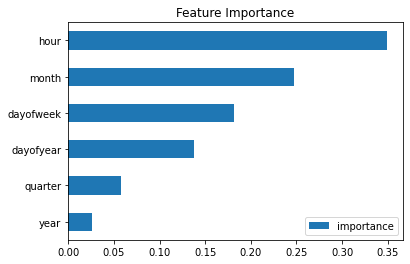

In [28]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

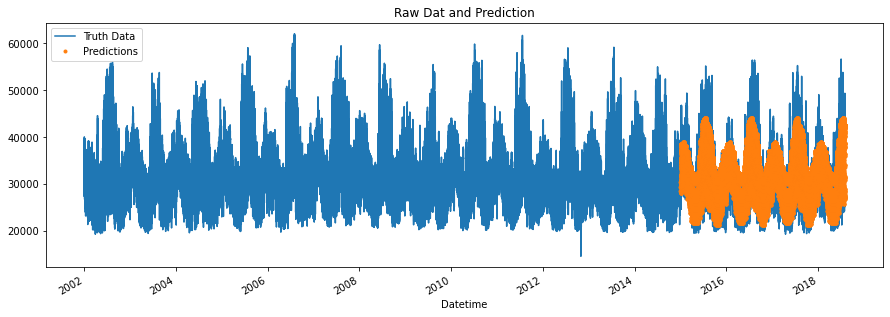

In [29]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

This code calculates the Root Mean Square Error (RMSE) score between the actual 'PJME_MW' values in the test dataset and their corresponding predictions. RMSE measures the average magnitude of errors between predicted and actual values. A lower RMSE indicates a better fit of the model. The calculated RMSE score is printed out for evaluation.

In [30]:
# Score (RMSE)
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3726.80


# ARCHITECTURE DIAGRAM FOR LINEAR REGRESSION :

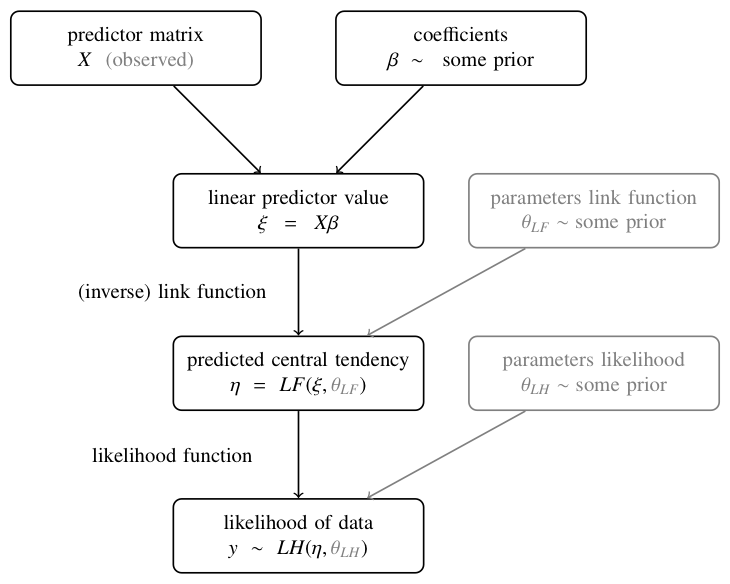

It Trains on the provided training data (X_train and y_train), makes predictions on the test data (X_test), calculates the mean squared error between the predicted values and actual target values (y_test), takes the square root of the mean squared error, and prints the resulting root mean squared error (RMSE) to evaluate the model's performance.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

print('Mean square error for linear regresion', np.sqrt(mean_squared_error(y_test, pred1)))

Mean square error for linear regresion 5683.9532823249065


# Conclusion :
          In conclusion,The Phase 2 of our innovation for Measure Energy consumption by using Machine learning models, time series analysis and Ensemble methods has been created for improving the prediction system's Accuarcy ,robustness and predict future energy consumption.....